<a href="https://colab.research.google.com/github/Dhruvin3103/ML/blob/main/SUV_prediction(Log_reg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SUV Prediction 

In [436]:
import matplotlib as plt
import numpy as np 
import seaborn as sns
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Dhruvin3103/ML/main/CSV/suv_data.csv")
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [437]:
df.tail(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
392,15748589,Female,45,45000,1
393,15635893,Male,60,42000,1
394,15757632,Female,39,59000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


<Axes: xlabel='Gender', ylabel='count'>

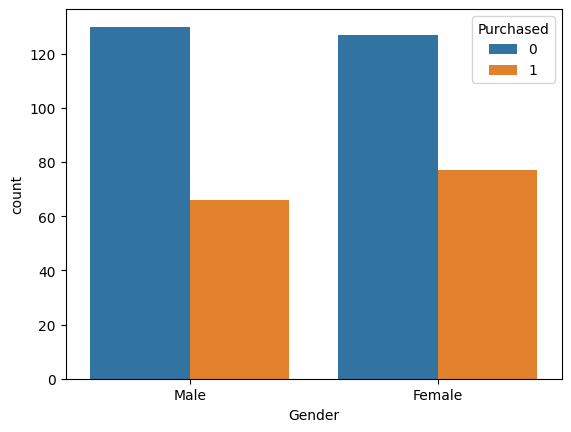

In [438]:
sns.countplot(x="Gender",hue="Purchased",data=df)

<Axes: ylabel='Frequency'>

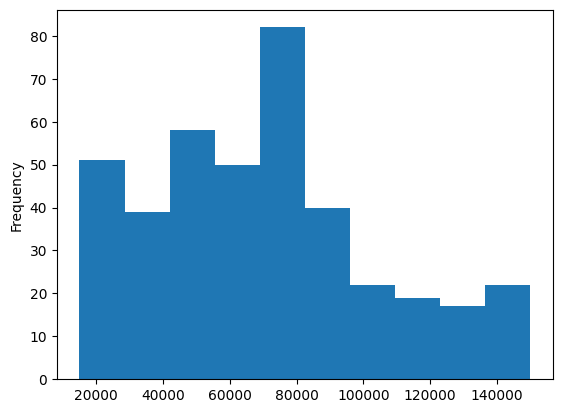

In [439]:
df["EstimatedSalary"].plot.hist()

<Axes: xlabel='SalaryCategory', ylabel='count'>

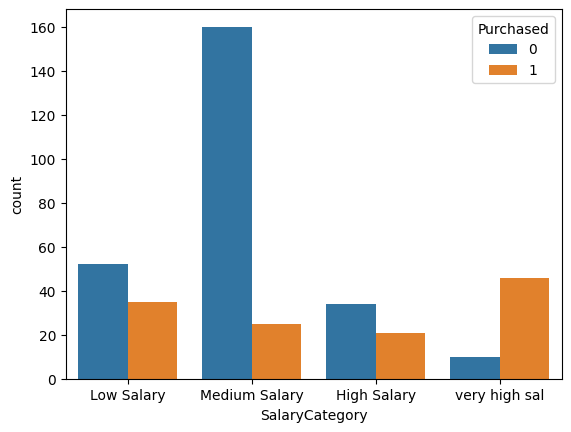

In [440]:
df2 = df.copy()
bins = [0, 40000, 80000, 100000, 140000]
labels =["Low Salary", "Medium Salary", "High Salary", "very high sal"]
df2['SalaryCategory'] = pd.cut(df2['EstimatedSalary'], bins, labels=labels)
df2.head()
# print(df2)
sal = pd.get_dummies(df2['SalaryCategory'])
# print(sal)
df = pd.concat([df,df2['SalaryCategory'],sal],axis=1)
# print(df.head(5))
# # df["Age"].plot.hist()
sns.countplot(x="SalaryCategory",hue="Purchased",data=df)

<Axes: ylabel='Frequency'>

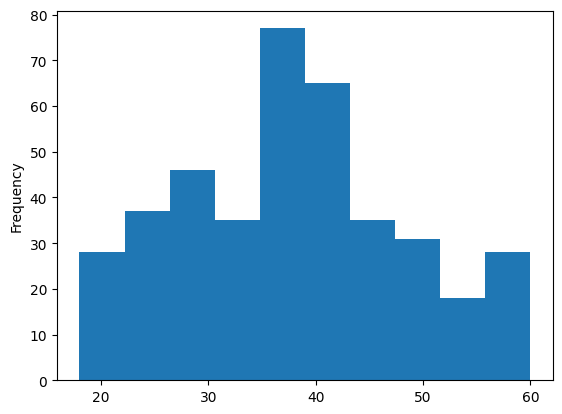

In [441]:
df["Age"].plot.hist()


      User ID  Gender  Age  EstimatedSalary  Purchased SalaryCategory  \
0    15624510    Male   19            19000          0     Low Salary   
1    15810944    Male   35            20000          0     Low Salary   
2    15668575  Female   26            43000          0  Medium Salary   
3    15603246  Female   27            57000          0  Medium Salary   
4    15804002    Male   19            76000          0  Medium Salary   
..        ...     ...  ...              ...        ...            ...   
395  15691863  Female   46            41000          1  Medium Salary   
396  15706071    Male   51            23000          1     Low Salary   
397  15654296  Female   50            20000          1     Low Salary   
398  15755018    Male   36            33000          0     Low Salary   
399  15594041  Female   49            36000          1     Low Salary   

     Low Salary  Medium Salary  High Salary  very high sal  less 20  20-30  \
0             1              0            0  

<Axes: xlabel='age_cat', ylabel='count'>

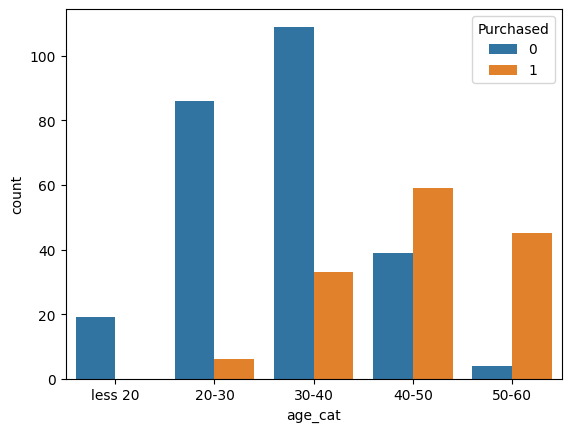

In [442]:
df3= df.copy()
# print(df3)
bin = [0,20,30,40,50,60]
label = ['less 20','20-30','30-40','40-50','50-60']
df3["age_cat"] = pd.cut(df3["Age"],bins=bin, labels = label)

age_cat = pd.get_dummies(df3["age_cat"])
# print(age_cat)
df = pd.concat([df,age_cat,df3["age_cat"]],axis=1)
print(df)
sns.countplot(x="age_cat",hue="Purchased",data=df)
# print(df3)

In [443]:
# agecat = []

# for i in range(len(df['Age'])):
#   if(df['Age'][i]<=20):
#     agecat.append("less than 20")
#   elif(21 <= df['Age'][i] <= 40):
#     agecat.append('20-40')
#   # elif(31 <= df['Age'][i] <= 40):
#   #   agecat.append('30-40')
#   elif(41 <= df['Age'][i] <= 60):
#     agecat.append('40-60')
#   # elif(51 <= df['Age'][i] <= 60):
#   #   agecat.append('50-60')
#   elif(df['Age'][i] >= 60):
#     agecat.append('more than 60')

# age_df = pd.DataFrame(data = agecat, columns = ["Age cat"])
# age_df = pd.get_dummies(age_df,drop_first=True)
# print(age_df)
# df = pd.concat([df,age_df],axis=1)
# print(df.head(5))
# # df["Age"].plot.hist()
# sns.countplot(x="Age cat",hue="Purchased",data=df)

# seprating dependent(gender, age, salary) and independent variables(purchase)**bold text** 

first separating gender with values 0 and 1 where 1 means men and vice versa so for this i used get_dummies from pandas lib

In [444]:
gen = pd.get_dummies(df["Gender"],drop_first=True)
gen

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


making df for x and y

In [445]:
# print(df)
x1 = df.iloc[:,[6,7,8,9,10,11,12,13,14]]
# print(x1)
X = pd.concat([x1,gen],axis=1)
X

,Low Salary,Medium Salary,High Salary,very high sal,less 20,20-30,30-40,40-50,50-60,Male
0,1,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,1
2,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
395,0,1,0,0,0,0,0,1,0,0
396,1,0,0,0,0,0,0,0,1,1
397,1,0,0,0,0,0,0,1,0,0
398,1,0,0,0,0,0,1,0,0,1


In [446]:
Y = df["Purchased"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

# Splitting the dataset in train and test data

In [447]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.6,random_state=0)
print("X - train set",X_train.shape)
print(X_train.head(5))
print("X - test set",X_test.shape)
print(X_test.head(5))
print("Y - train set",Y_train.shape)
print(Y_train.head(5))
print("Y - test set",Y_test.shape)
print(Y_test.head(5))

X - train set (160, 10)
     Low Salary  Medium Salary  High Salary  very high sal  less 20  20-30  \
397           1              0            0              0        0      0   
118           0              1            0              0        0      0   
254           0              1            0              0        0      0   
188           0              1            0              0        0      0   
208           0              0            0              0        0      0   

     30-40  40-50  50-60  Male  
397      0      1      0     0  
118      1      0      0     1  
254      0      1      0     0  
188      1      0      0     1  
208      1      0      0     0  
X - test set (240, 10)
     Low Salary  Medium Salary  High Salary  very high sal  less 20  20-30  \
132           0              0            1              0        0      1   
309           0              1            0              0        0      0   
341           0              1            0         

implementation  of Logistic Regression**

In [448]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [449]:
pred = model.predict(X_test)

checking the accuracy using sklearn libs

In [450]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# print(classification_report(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(accuracy_score(Y_test,pred)*100)

[[135  12]
 [ 27  66]]
83.75
